# Introduction to neural network classification with tensorflow

* how to write neural network classification - classify somethig as one thing or other
* Types : 
    * Binary classification
    * Multiclass classification
    * Multilable classification

In [1]:
# %pip install Scikit-learn


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# make 100 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

Our data is a little hard to understand right now.. lets visualize it!

In [3]:

import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


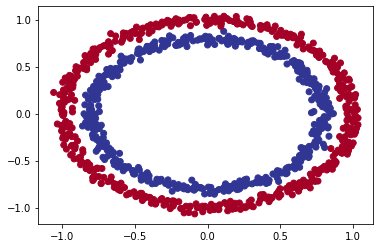

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

# Steps in modelling

In [6]:
import tensorflow as tf

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.8704 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.6049 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6695 - accuracy: 0.5270
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6101 - accuracy: 0.5290
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6125 - accuracy: 0.5250


In [8]:
# long time
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [9]:
# Working on binary classification problem 
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X, y, epochs=100, verbose=0)

In [10]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

#Improving our model

1. Create a model - add more layers or increace number of hidden layers
2. compile a model - choose diff optimizer function 
3. Fiting a model - more epochs
<!-- 4. Evaluate it -->

In [11]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X, y, epochs=100, verbose=0)

In [13]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5100


[0.7001472115516663, 0.5099999904632568]

# model_3.predict(X)
# To visulize our model's predictions, let's create a function plot_decision_boundary() , this function will,

* features x, and labels (y)
* create meshgrid
* make predictions
* plot the prediction

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred) > 1:
        print('doing multiclass classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [15]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


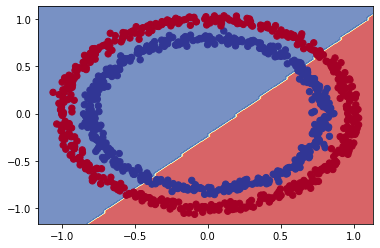

In [16]:
# check out predicitons
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)


In [17]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1360036756154805,
 -1.1677683182718437,
 1.1337117525463374)

In [18]:
np.linspace(5, 10, 100)

array([ 5.        ,  5.05050505,  5.1010101 ,  5.15151515,  5.2020202 ,
        5.25252525,  5.3030303 ,  5.35353535,  5.4040404 ,  5.45454545,
        5.50505051,  5.55555556,  5.60606061,  5.65656566,  5.70707071,
        5.75757576,  5.80808081,  5.85858586,  5.90909091,  5.95959596,
        6.01010101,  6.06060606,  6.11111111,  6.16161616,  6.21212121,
        6.26262626,  6.31313131,  6.36363636,  6.41414141,  6.46464646,
        6.51515152,  6.56565657,  6.61616162,  6.66666667,  6.71717172,
        6.76767677,  6.81818182,  6.86868687,  6.91919192,  6.96969697,
        7.02020202,  7.07070707,  7.12121212,  7.17171717,  7.22222222,
        7.27272727,  7.32323232,  7.37373737,  7.42424242,  7.47474747,
        7.52525253,  7.57575758,  7.62626263,  7.67676768,  7.72727273,
        7.77777778,  7.82828283,  7.87878788,  7.92929293,  7.97979798,
        8.03030303,  8.08080808,  8.13131313,  8.18181818,  8.23232323,
        8.28282828,  8.33333333,  8.38383838,  8.43434343,  8.48

In [19]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368],
        [-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368],
        [-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368],
        ...,
        [-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368],
        [-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368],
        [-1.15950246, -1.13631553, -1.1131286 , ...,  1.08962981,
          1.11281674,  1.13600368]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14452104, -1.14452104, -1.14452104, ..., -1.14452104,
         -1.14452104, -1.14452104],
        [-1.12127377, -1.12127377, -1.12127377, ..., -1.12127377,
         -1.12127377, -1.12127377],
        ...,
        [ 1.08721721,  1.08721721,  1.08721721, ...,  

In [20]:
# Lets see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# X_regression, y_regression
# Split our regression data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [22]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 598.7621 - mae: 598.7621
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 484.9231 - mae: 484.9231
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 376.2695 - mae: 376.2695
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 264.2700 - mae: 264.2700
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 147.7883 - mae: 147.7883
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 52.2957 - mae: 52.2957
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 81.1270 - mae: 81.1270
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 75.3590 - mae: 75.3590
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.4928 - mae: 48.4928
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 51.0274 - mae: 51.0274
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 2ms/step


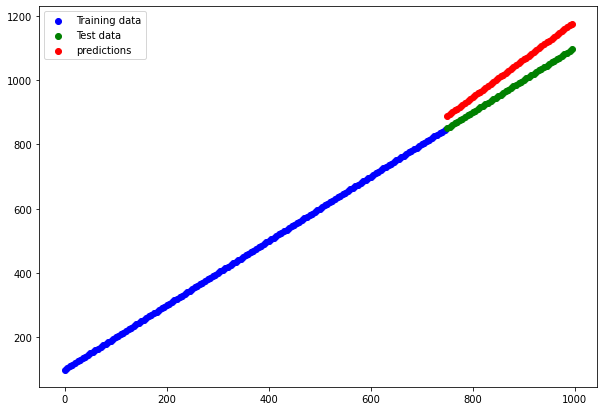

In [23]:
# Make prediction with our trained model 
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="predictions")
plt.legend()

# The missing piece - Non-linearity


In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.2313 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2178 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1923 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1705 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1269 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0991 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0962 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0852 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1019 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1009 - accuracy: 0.4850
Epoch 11/

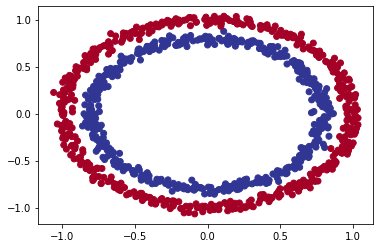

In [27]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


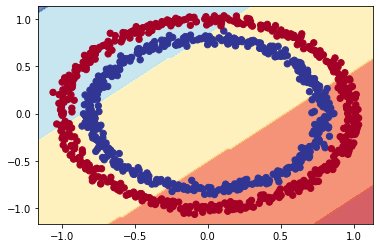

In [28]:
# check the decision boundary for our latest model 
plot_decision_boundary(model_4, X, y)

Lets try build our first non linear model

In [29]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0426 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9827 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8906 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7430 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6387 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5803 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5334 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5247 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5073 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4936 - accuracy: 0.4730
Epoch 11/

In [30]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
    
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 0.8918 - accuracy: 0.3630
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8439 - accuracy: 0.3170
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8231 - accuracy: 0.3320
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8116 - accuracy: 0.3460
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8017 - accuracy: 0.3500
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7937 - accuracy: 0.3610
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7865 - accuracy: 0.3590
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7806 - accuracy: 0.3670
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7743 - accuracy: 0.3640
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7691 - accuracy: 0.3700
Epoch 11/

In [31]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9860


[0.045050669461488724, 0.9860000014305115]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


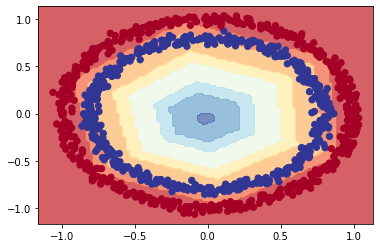

In [32]:
plot_decision_boundary(model_6, X, y)

In [33]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4970
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5080
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4860
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4840
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5120
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5110
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5070
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5110
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5120
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5120
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


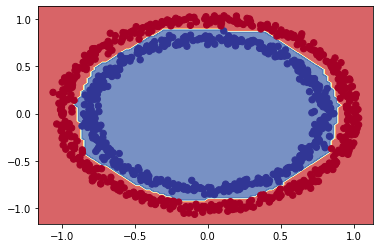

In [34]:
plot_decision_boundary(model_7, X, y)

In [35]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

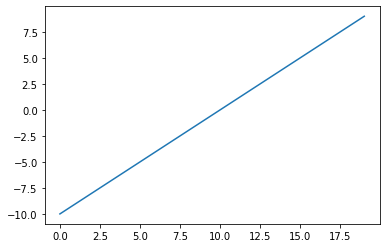

In [36]:
plt.plot(A)

In [37]:
# sigmoid(x) = 1/ 1+exp(-x)
def sigmoid(x):
    return 1/(1 + tf.math.exp(-x))

# Used the sigmoid function on our tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

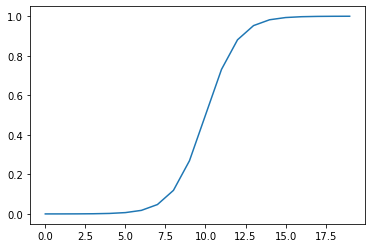

In [38]:
plt.plot(sigmoid(A))

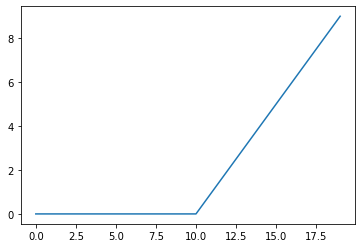

In [39]:
def relu(x):
    return tf.maximum(x, 0)

plt.plot(relu(A))


Evaluating and improving our classification

In [45]:
from sklearn.model_selection import train_test_split

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [58]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6450
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7325
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8587
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.9000
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9438
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9600
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9600
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9650
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9688
Epoch 11/25
25/25 [

In [59]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9850


[0.038398705422878265, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


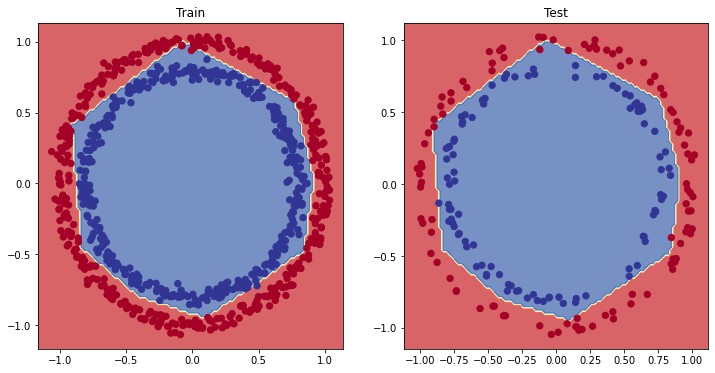

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Model_8 loss curve')

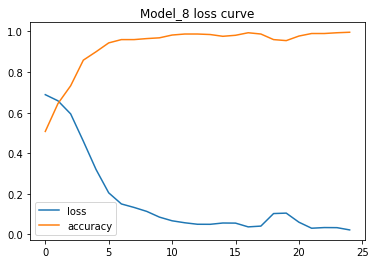

In [68]:
# Plot the loss (or training) curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

In [69]:
# Finding the best learning rate

# To find the ideal leraning rate , we're going to use the following steps:
# * A learning rate * callback * - You can thihnk of a call back as an extra piece of functionality, while you add to your while training

# * A modified curve plot


In [76]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Create a leaning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6970 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<AxesSubplot:xlabel='epochs'>

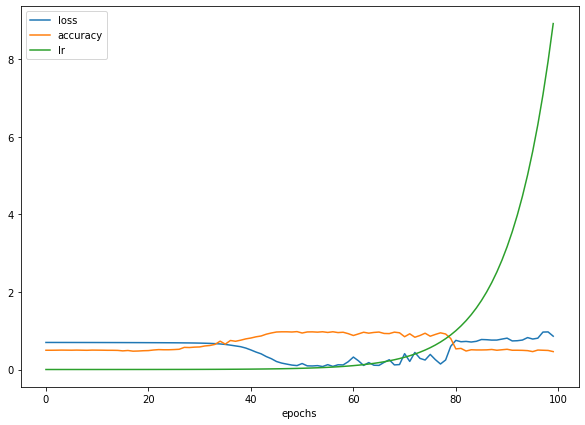

In [77]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

In [78]:
# PLot the leraning rate versrsus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'lerning rate vs loss')

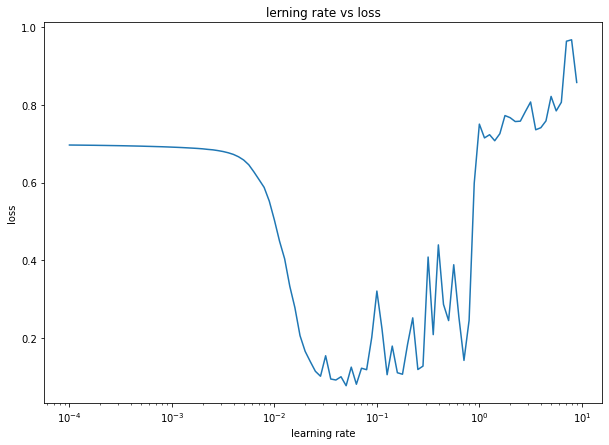

In [80]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("lerning rate vs loss")

In [82]:
10e-2, 10e-1

(0.1, 1.0)

In [84]:
10**-2, 10**-1

(0.01, 0.1)

In [86]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6849 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5688
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6125
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6450
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7450
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8800
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.9000
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9488
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [87]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9950


[0.034773267805576324, 0.9950000047683716]

In [88]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9850


[0.038398705422878265, 0.9850000143051147]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


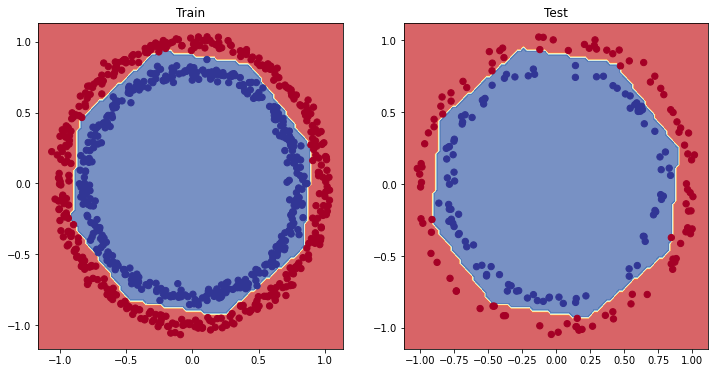

In [89]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

In [112]:
tf.random.set_seed(42)

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

my_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

history = my_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 0.6952 - accuracy: 0.4837
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5913
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6300
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.8150
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.8975
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.9675
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9862
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9975
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9987
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 1.0000


In [113]:
my_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 1.0000


[0.035054389387369156, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


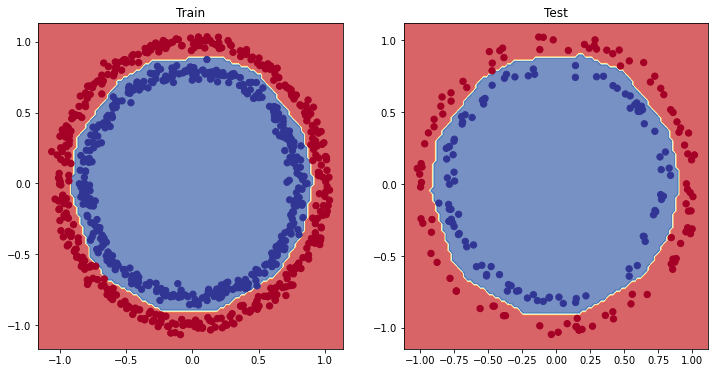

In [114]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_model, X_test, y_test)
plt.show()

Accuracy of our model

In [115]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy * 100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9950
Model loss on the test set: 0.034773267805576324
Model accuracy on the test set: 99.50%


In [135]:
# How about confusion matrix?

from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
y_preds = tf.round(y_preds)
# y_preds = tf.cast(y_preds, tf.int32)
# y_test = tf.cast(y_test, tf.int32)
confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 4ms/step


array([[100,   1],
       [  0,  99]], dtype=int64)

In [127]:
y_test[:10], y_preds[:10]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])>,
 array([[9.4735116e-01],
        [9.9946642e-01],
        [9.9484235e-01],
        [9.9082750e-01],
        [2.6830211e-01],
        [8.3260931e-04],
        [9.8602325e-01],
        [1.7564716e-02],
        [9.9819261e-01],
        [5.2499189e-03]], dtype=float32))

In [128]:
5.2499189e-03

0.0052499189

In [138]:
# Working with larger example (multiclass classification)


# When you have more than two classes an option, its a multi-class classification.


In [141]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test ssset for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 54s 12us/step


In [142]:
class_names = ["T-shirt/top", "Trouser", "pullover", 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Dress')

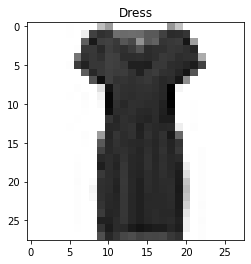

In [143]:
# Plot an exapmle image and its label
index = 20

plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

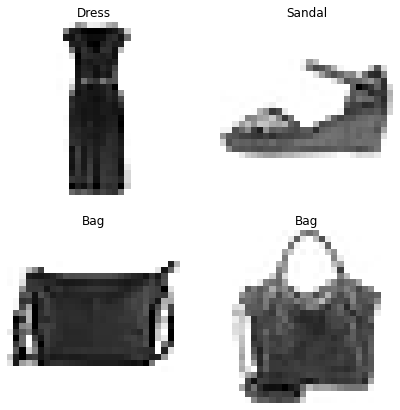

In [149]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)
  # plt.show()

In [150]:
# Building a multi class classification model 

# * tweak a few things:
    # * Input shpae = 28 x 28 (the shape of one image)
    # * Output shape = 10 (one per class of clothing)
    # * Loss function = tf.keras.losses.CategoricalCrossentropy()
    # * Output layer activation = Softmax

In [156]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [155]:
28 * 28

784

In [159]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [160]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.0566 - accuracy: 0.2157 - val_loss: 1.8354 - val_accuracy: 0.2845
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6318 - accuracy: 0.3326 - val_loss: 1.5092 - val_accuracy: 0.4020
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4200 - accuracy: 0.4192 - val_loss: 1.3774 - val_accuracy: 0.3959
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2528 - accuracy: 0.4741 - val_loss: 1.2079 - val_accuracy: 0.5006
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0976 - accuracy: 0.5596 - val_loss: 1.0613 - val_accuracy: 0.5768
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0167 - accuracy: 0.5976 - val_loss: 0.9959 - val_accuracy: 0.6311
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9127 - accuracy: 0.6723 - val_loss: 0.8741 - val_accuracy:

In [162]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.2002 - accuracy: 0.1559 - val_loss: 2.0014 - val_accuracy: 0.2116
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8413 - accuracy: 0.2306 - val_loss: 1.7519 - val_accuracy: 0.2254
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7132 - accuracy: 0.2665 - val_loss: 1.6808 - val_accuracy: 0.2740
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6443 - accuracy: 0.2919 - val_loss: 1.5974 - val_accuracy: 0.2946
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5785 - accuracy: 0.3135 - val_loss: 1.5541 - val_accuracy: 0.3146
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5523 - accuracy: 0.3240 - val_loss: 1.5378 - val_accuracy: 0.3488
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5357 - accuracy: 0.3310 - val_loss: 1.5260 - val_accuracy

In [163]:
# Check the model summayr
model_11.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_112 (Dense)           (None, 4)                 3140      
                                                                 
 dense_113 (Dense)           (None, 4)                 20        
                                                                 
 dense_114 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [172]:
# Check the min max values of the tarining

In [174]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history = model_12.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0939 - accuracy: 0.6206 - val_loss: 0.7159 - val_accuracy: 0.7646
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6590 - accuracy: 0.7769 - val_loss: 0.6609 - val_accuracy: 0.7704
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6032 - accuracy: 0.7922 - val_loss: 0.6185 - val_accuracy: 0.7776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5810 - accuracy: 0.7993 - val_loss: 0.6003 - val_accuracy: 0.7922
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5690 - accuracy: 0.8001 - val_loss: 0.5945 - val_accuracy: 0.7916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5587 - accuracy: 0.8025 - val_loss: 0.5896 - val_accuracy: 0.7965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5519 - accuracy: 0.8057 - val_loss: 0.6043 - val_accuracy:

In [175]:
# Neural networks tend to prefer data in numerical form as well as scaled/normalized form

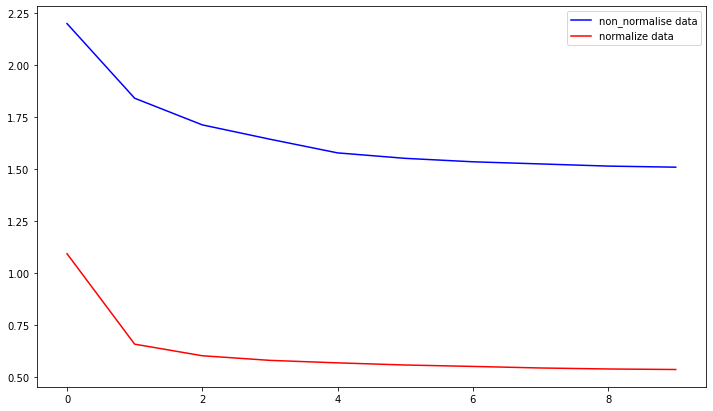

In [181]:
plt.figure(figsize=(12, 7))
plt.plot(non_norm_history.history['loss'], c='b', label='non_normalise data')
plt.plot(norm_history.history['loss'], c='r', label='normalize data')
plt.legend()

<AxesSubplot:title={'center':'Normalized data'}>

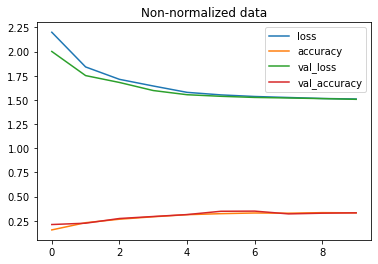

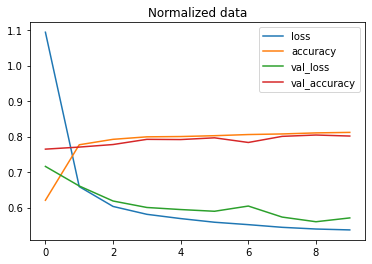

In [182]:
import pandas as pd

# PLot non- normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
pd.DataFrame(norm_history.history).plot(title="Normalized data")


In [185]:
# Finding the ideal learning rate

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Create the leraning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.1195 - accuracy: 0.5613 - val_loss: 0.8569 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7894 - accuracy: 0.7174 - val_loss: 0.7718 - val_accuracy: 0.7315 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7040 - accuracy: 0.7498 - val_loss: 0.6849 - val_accuracy: 0.7609 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6321 - accuracy: 0.7764 - val_loss: 0.6362 - val_accuracy: 0.7799 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5957 - accuracy: 0.7924 - val_loss: 0.6124 - val_accuracy: 0.7885 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5735 - accuracy: 0.8019 - val_loss: 0.6052 - val_accuracy: 0.7952 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

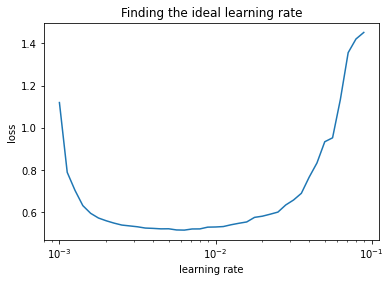

In [187]:
# Plot the learning rate decay curve 

lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [189]:
10 ** -3

0.001

In [190]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_14 = model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6206 - accuracy: 0.3763 - val_loss: 1.3307 - val_accuracy: 0.4700
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1899 - accuracy: 0.5325 - val_loss: 1.1158 - val_accuracy: 0.5443
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0709 - accuracy: 0.5591 - val_loss: 1.0571 - val_accuracy: 0.5707
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0183 - accuracy: 0.5832 - val_loss: 1.0315 - val_accuracy: 0.5808
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9202 - accuracy: 0.6502 - val_loss: 0.8262 - val_accuracy: 0.6894
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7564 - accuracy: 0.7161 - val_loss: 0.7929 - val_accuracy: 0.7041
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7021 - accuracy: 0.7484 - val_loss: 0.7146 - val_accuracy:

In [191]:
# Evaluating our multi-class classification model 


In [192]:
class_names

['T-shirt/top',
 'Trouser',
 'pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [197]:
y_probs = model_14.predict(test_data_norm)

y_probs[0]

313/313 [==============================] - 1s 3ms/step


array([3.27376043e-03, 2.44908093e-04, 6.32978883e-03, 3.82763828e-04,
       1.15483796e-04, 9.92447957e-02, 4.24885517e-03, 8.13823581e-01,
       2.54682847e-03, 6.97892234e-02], dtype=float32)

In [198]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [202]:
# convert all of the prediction probabilites into integers 

y_preds = y_probs.argmax(axis=1)

y_preds[:10] == test_labels[:10]

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [213]:

from sklearn.metrics import confusion_matrix

y_preds = tf.round(y_preds)
# y_preds = tf.cast(y_preds, tf.int32)
# y_test = tf.cast(y_test, tf.int32)
confusion_matrix(test_labels, y_preds)

array([[742,   2,  13,  78,   7,   1, 144,   2,  11,   0],
       [  1, 949,  13,  33,   2,   0,   1,   0,   1,   0],
       [ 10,   5, 719,  13, 167,   0,  84,   0,   2,   0],
       [ 52,  21,  19, 810,  29,   1,  64,   2,   1,   1],
       [  0,   1, 125,  32, 764,   0,  76,   0,   2,   0],
       [  1,   0,   0,   0,   0, 849,   0, 123,  11,  16],
       [142,   2, 138,  62, 175,   1, 472,   1,   7,   0],
       [  0,   0,   0,   0,   0,  36,   0, 927,   0,  37],
       [ 25,   0,   4,   2,   4,  16,  58,   5, 885,   1],
       [  0,   0,   0,   0,   0,   5,   0, 117,   1, 877]], dtype=int64)

In [212]:
confusion_matrix(test_labels, tf.round(y_preds))

array([[742,   2,  13,  78,   7,   1, 144,   2,  11,   0],
       [  1, 949,  13,  33,   2,   0,   1,   0,   1,   0],
       [ 10,   5, 719,  13, 167,   0,  84,   0,   2,   0],
       [ 52,  21,  19, 810,  29,   1,  64,   2,   1,   1],
       [  0,   1, 125,  32, 764,   0,  76,   0,   2,   0],
       [  1,   0,   0,   0,   0, 849,   0, 123,  11,  16],
       [142,   2, 138,  62, 175,   1, 472,   1,   7,   0],
       [  0,   0,   0,   0,   0,  36,   0, 927,   0,  37],
       [ 25,   0,   4,   2,   4,  16,  58,   5, 885,   1],
       [  0,   0,   0,   0,   0,   5,   0, 117,   1, 877]], dtype=int64)

In [244]:
import random

def plot_random_image(model, images, true_labels, classes):
    """ 
        Picks a rondom image, plots it and labels it with a prediction and truth labell
    """


    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    #optional
    if pred_label == true_labels:
        color= 'green'
    else:
        color = 'red' 

    # plt.xlabel("Pred: {} {:2.0f}% (True: {})").format(pred_label,
    #                                             100*tf.reduce_max(pred_probs),
    #                                             true_label),
    #             color=color)
    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}%", color=color)

1/1 [==============================] - 0s 47ms/step


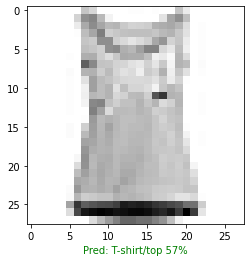

In [274]:
plot_random_image(model=model_14,
                images=test_data_norm,
                true_labels=test_labels,
                classes=class_names
                )

In [275]:
model_14.layers[1]

In [276]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.15157494,  0.21073431, -0.19678563, -0.03009541],
        [-1.0248427 , -0.19334818,  0.29379165,  0.35223222],
        [-0.53177196, -0.33433974, -0.45292795,  0.19084203],
        ...,
        [ 0.216659  , -1.4060072 ,  0.28221074,  0.42722297],
        [ 0.03724291, -1.0542207 ,  0.24400435,  0.47070196],
        [-0.5212436 , -0.9819782 ,  0.05916291,  0.2587566 ]],
       dtype=float32),
 (784, 4))

In [277]:
biases, biases.shape

(array([0.934744  , 1.9065164 , 0.14776427, 0.19979188], dtype=float32), (4,))

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [279]:
%pip install pydot


In [281]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
